# Predicting Airbnb Prices using Regression Tree, Random Forest and XGBoost Models

Read Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import folium


## 1. Read Data

In [2]:
Hongkong = pd.read_excel("Hongkong.xlsx")

In [80]:
#Variables Information
Hongkong.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12569 entries, 0 to 12568
Data columns (total 76 columns):
host_since                                      12568 non-null datetime64[ns]
host_length                                     12569 non-null int64
host_response_time                              9893 non-null object
host_response_rate                              9893 non-null float64
host_is_superhost                               12568 non-null object
host_neighbourhood                              9545 non-null object
host_listings_count                             12568 non-null float64
host_total_listings_count                       12568 non-null float64
host_verifications                              12569 non-null object
host_has_profile_pic                            12568 non-null object
host_identity_verified                          12568 non-null object
neighbourhood                                   11068 non-null object
neighbourhood_cleansed                      

## 2. Data Preprocessing

Reduce Dimension

In [82]:
useless = ['host_since', 'host_neighbourhood','host_listings_count','host_verifications','host_has_profile_pic','neighbourhood','city','state','zipcode','market','country','is_location_exact','property_type','amenities','square_feet','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm','calendar_updated','availability_60','availability_90','availability_365','calendar_last_scraped','number_of_reviews','number_of_reviews_ltm','first_review','last_review','requires_license','license','jurisdiction_names','is_business_travel_ready','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms']
Step1 = Hongkong.drop(columns = useless)


Missing Value Check

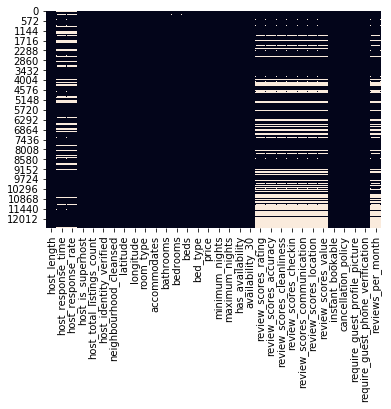

In [83]:
sns.heatmap(Step1.isnull(), cbar=False)


Clean Data (Step 1)

In [7]:
Step2 = Step1[Step1.price>0]
Step3 = Step2.drop(Step2.columns[[1,2]],axis=1)
Step4=Step3.dropna(how='any',axis=0).reset_index(drop=True)
Step4

,host_length,host_is_superhost,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,latitude,longitude,room_type,accommodates,bathrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,reviews_per_month
0,3431,f,2.0,t,Central & Western,22.28352,114.15018,Entire home/apt,3,1.0,...,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,1.27
1,3139,t,1.0,t,Islands,22.20022,114.13461,Entire home/apt,1,1.0,...,9.0,9.0,10.0,10.0,9.0,f,moderate,f,f,0.71
2,3285,f,12.0,f,Central & Western,22.28407,114.15570,Entire home/apt,6,1.0,...,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2.65
3,3285,f,12.0,f,Central & Western,22.28868,114.14494,Entire home/apt,6,1.0,...,10.0,10.0,9.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2.66
4,3101,f,1.0,t,Central & Western,22.28343,114.15539,Entire home/apt,2,1.0,...,9.0,10.0,10.0,10.0,10.0,f,moderate,f,f,0.28
5,3285,f,12.0,f,Central & Western,22.28651,114.14874,Entire home/apt,6,1.0,...,9.0,9.0,9.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2.17
6,3285,f,12.0,f,Central & Western,22.28694,114.14855,Entire home/apt,6,1.0,...,10.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,f,f,2.24
7,3140,f,11.0,f,Islands,22.30388,114.00887,Entire home/apt,8,1.0,...,8.0,9.0,9.0,9.0,8.0,f,flexible,f,f,1.26
8,2990,f,1.0,f,Yau Tsim Mong,22.30983,114.16911,Private room,2,1.0,...,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,0.18
9,2975,f,1.0,f,Yuen Long,22.45758,114.00590,Private room,2,1.0,...,9.0,10.0,9.0,10.0,9.0,f,strict_14_with_grace_period,f,f,0.05


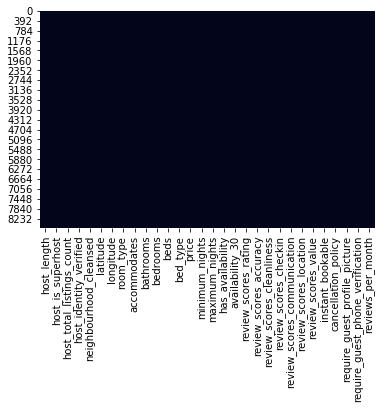

In [8]:
sns.heatmap(Step4.isnull(),cbar=False)

## 3. Data Visualization

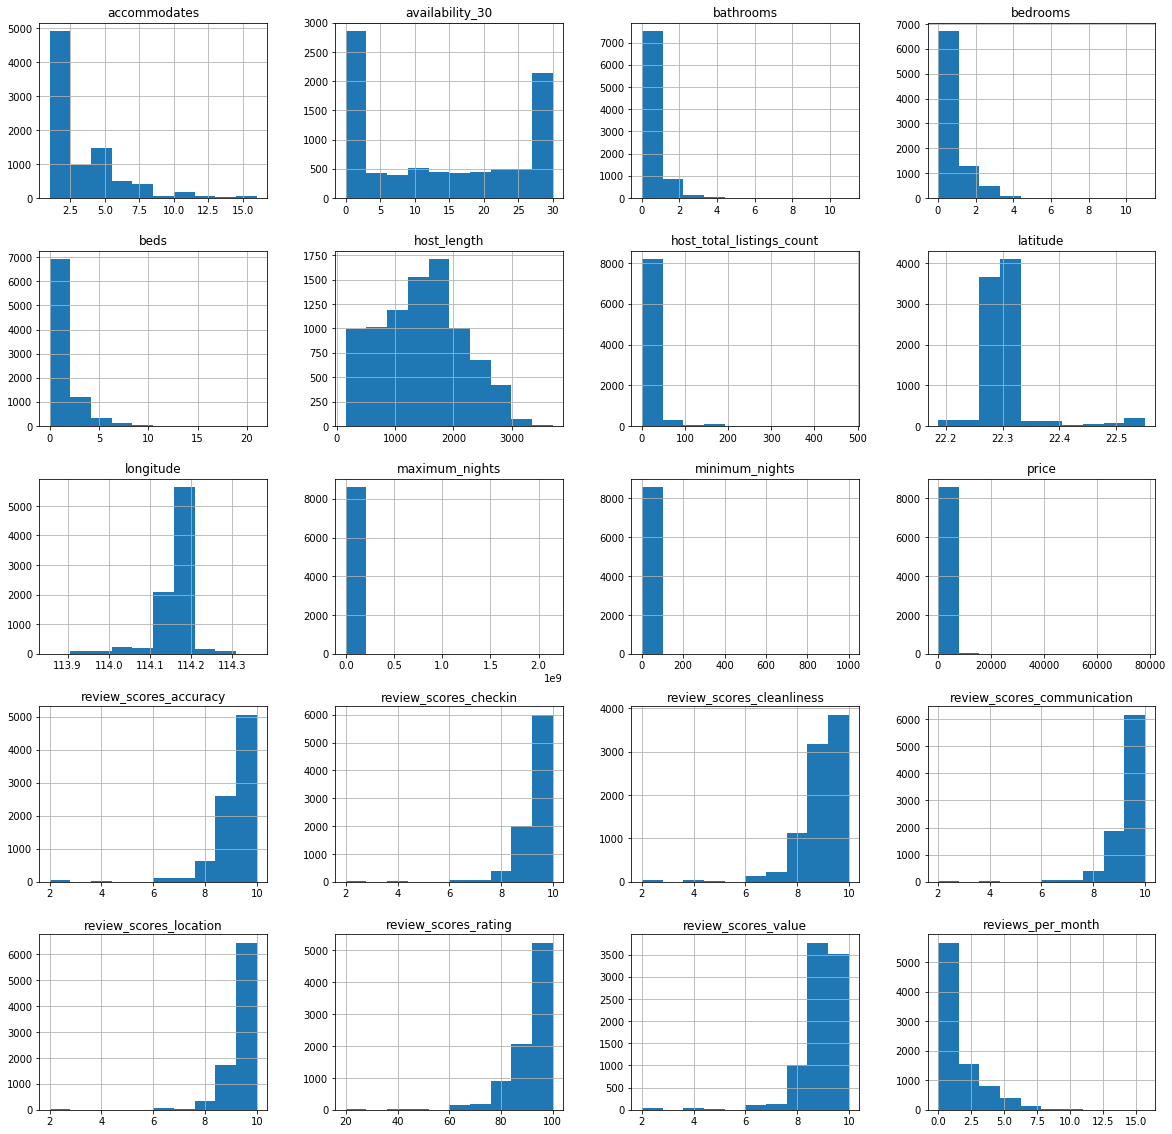

In [84]:
DataVisualization = Step4
# create histogram for numeric data for checking standardization
DataVisualization.hist(figsize=(20,20));

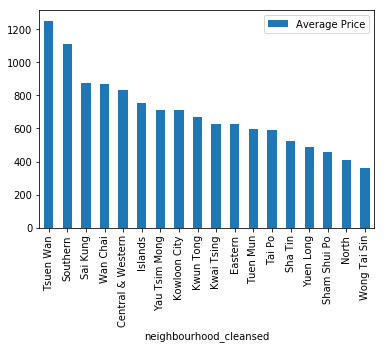

In [16]:
#Average price in 18 regions
Price = pd.DataFrame(Step4.groupby('neighbourhood_cleansed')['price'].mean()).sort_values('price',ascending = False).reset_index()
Price['Average Price']=Price['price']
Price=Price.drop("price",axis=1)
Price.plot(kind='bar',x='neighbourhood_cleansed',y='Average Price')

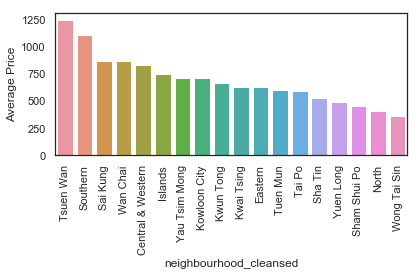

In [148]:
Avg = sns.barplot(x='neighbourhood_cleansed',y='Average Price',data=Price)
Avg.set_xticklabels(Avg.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()

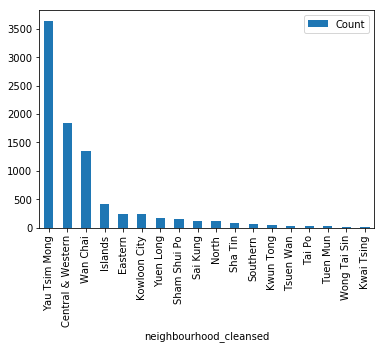

In [18]:
#Number of listings in 18 regions
Count = pd.DataFrame(Step4.groupby('neighbourhood_cleansed')['host_length'].count()).sort_values('host_length',ascending = False).reset_index()
Count['Count']=Count['host_length']
Count.plot(kind='bar',x='neighbourhood_cleansed',y='Count')

## 4. Data preprocessing II before running models

In [85]:
##Creating dummies on categorical variables and drop unused columns
Step5 = pd.get_dummies(Step4,prefix=['neighbourhood_cleansed','room_type','bed_type', 'cancellation_policy'], columns=['neighbourhood_cleansed','room_type', 'bed_type','cancellation_policy'])
Step5 = Step5.drop(["latitude","longitude"],axis=1)


In [86]:
#Replace value from 't' and 'f' to 0 and 1
Step5[['host_is_superhost']]=Step5[['host_is_superhost']].replace(to_replace=['f', 't'], value=[0, 1])
Step5[['host_identity_verified']]=Step5[['host_identity_verified']].replace(to_replace=['f', 't'], value=[0, 1])
Step5[['has_availability']]=Step5[['has_availability']].replace(to_replace=['f', 't'], value=[0, 1])
Step5[['instant_bookable']]=Step5[['instant_bookable']].replace(to_replace=['f', 't'], value=[0, 1])
Step5[['require_guest_profile_picture']]=Step5[['require_guest_profile_picture']].replace(to_replace=['f', 't'], value=[0, 1])
Step5[['require_guest_phone_verification']]=Step5[['require_guest_phone_verification']].replace(to_replace=['f', 't'], value=[0, 1])


In [87]:
#Standardization
from sklearn.preprocessing import StandardScaler
x= Step5[["host_length","host_total_listings_count",'accommodates','bathrooms','bedrooms','beds','minimum_nights',
          "maximum_nights","availability_30","review_scores_rating","review_scores_accuracy","review_scores_cleanliness",
          "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]]
scaler = StandardScaler()
Step5[["host_length","host_total_listings_count",'accommodates','bathrooms','bedrooms','beds','minimum_nights',
          "maximum_nights","availability_30","review_scores_rating","review_scores_accuracy","review_scores_cleanliness", 
          "review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]] = pd.DataFrame(scaler.fit_transform(x),columns=list(x.columns))

In [88]:
#Create corrplot
def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

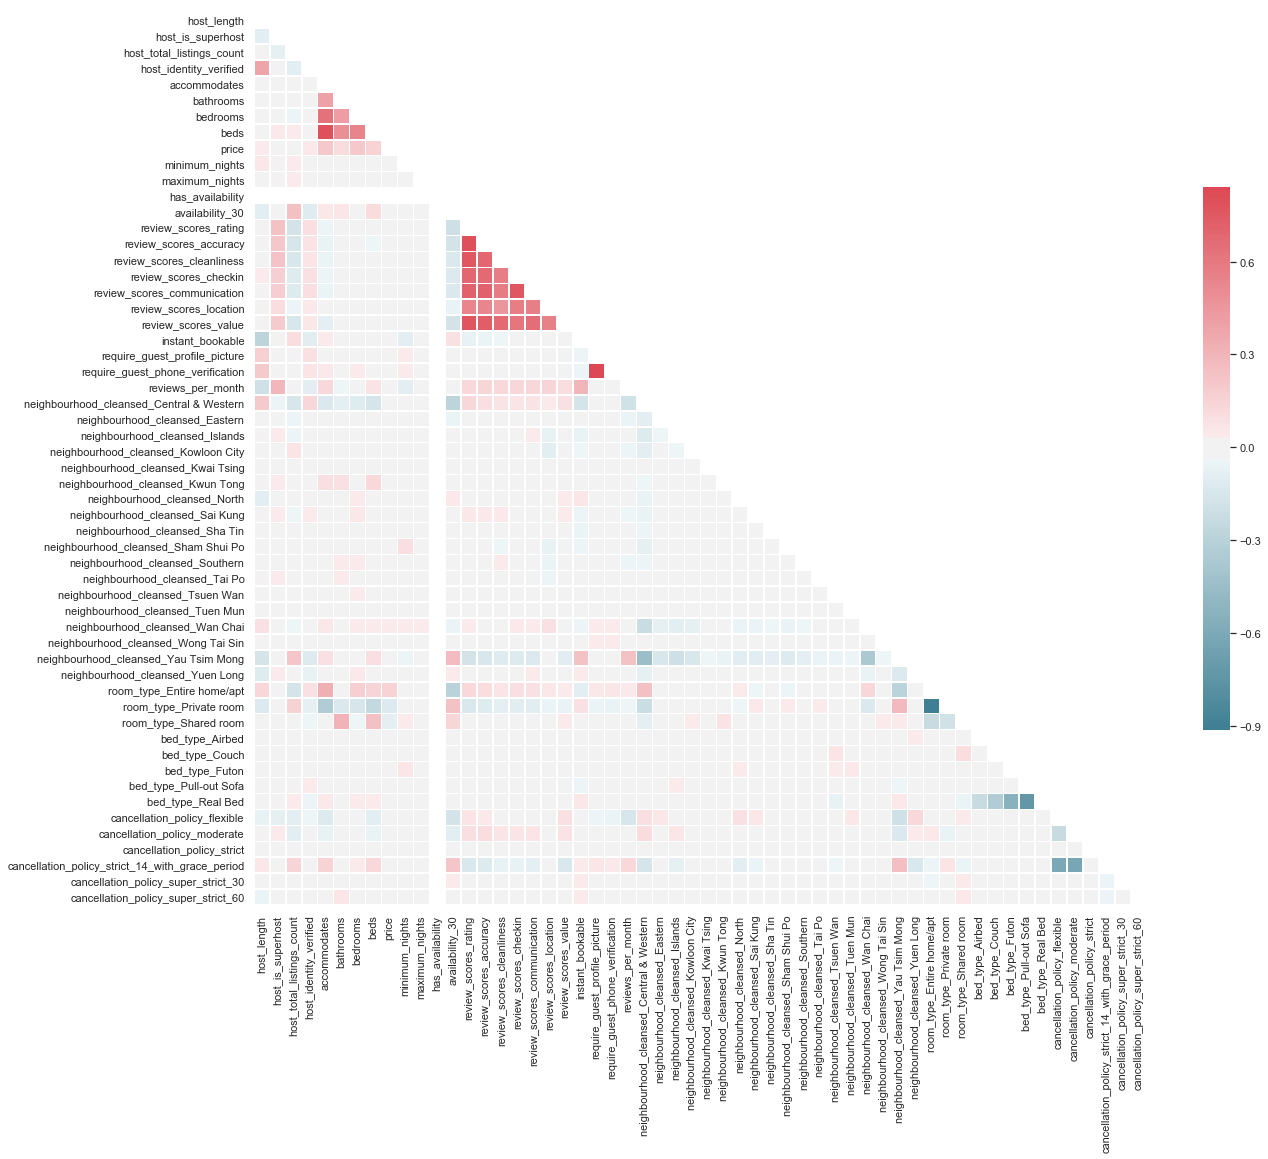

In [89]:
multi_collinearity_heatmap(Step5, figsize=(20,20))

In [90]:
Step5 = Step5.drop(['has_availability','require_guest_phone_verification','room_type_Entire home/apt','beds'],axis=1)

## 5. Models

In [91]:
#Partition
from sklearn.model_selection import train_test_split
x = np.array(Step5.drop(columns = 'price'))
y = np.array(Step5[['price']])


In [92]:
x_train,x_test = train_test_split(
    x,test_size=0.3, random_state=1)
y_train,y_test = train_test_split(
    y,test_size=0.3, random_state=1)

Run a Regression Model First

In [93]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#Predict
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = lm.predict(x_test)
y_pred = np.hstack(y_pred)
rms_reg = sqrt(mean_squared_error(y_pred,y_test))
rms_reg

788.6637268751462

Tree

In [104]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [105]:
#Predict
y_pred_tree = tree.predict(x_test)
rms_tree = sqrt(mean_squared_error(y_pred_tree, y_test))
rms_tree

893.6310001393517

KNN

In [106]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [107]:
#Predict
y_pred_KNN = knn.predict(x_test)
y_pred_KNN = np.hstack(y_pred_KNN)
rms_KNN = sqrt(mean_squared_error(y_pred_KNN, y_test))
rms_KNN

1110.1498073756745

Random Forest

In [135]:
# Tune Parameters
from sklearn.ensemble import RandomForestRegressor
randomforest = RandomForestRegressor()
parameters = {'bootstrap': [True],
              'max_depth': [70],
              'max_features': ['auto'],
              'min_samples_leaf': [4],
              'min_samples_split': [10],
              'n_estimators': [50,100,150,200,250,300,350,400]}
rf_grid = GridSearchCV(estimator=randomforest,param_grid = parameters,cv=5);
rf_grid.fit(x_train,y_train)
rf_grid.best_estimator_

C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\lzd05\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=70, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=350, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [136]:
y_pred_rf = rf_grid.predict(x_test)
sqrt(mean_squared_error(y_pred_rf,y_test))

755.1943702211119

XGBoost

Tune Parameters 

In [74]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
xgboost = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}
xgb_grid = GridSearchCV(xgboost,
                        parameters,
                        cv = 5,
                        verbose=True)
xgb_grid.fit(x_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bytree=1,
                                    gamma=0, learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=True,
                                    subsample=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimator

In [78]:
#Best Parameters
best_parameters = xgb_grid.best_params_
xgb_grid.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=0.7, gamma=0, learning_rate=0.03,
             max_delta_step=0, max_depth=5, min_child_weight=4, missing=None,
             n_estimators=500, n_jobs=1, nthread=4, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=1, subsample=0.7)

In [76]:
#Predict
y_grid_pred_XGB = xgb_grid.predict(x_test)
sqrt(mean_squared_error(y_grid_pred_XGB,y_test))

820.0862262250207